# Calculation of the Probability distribution function

The donors were assumed to be at 50nm below the micromagnet. The magnetic field is calculated in a 200nm x 200nm region between the two micromagnets.

# Plot of the Magnetic Field in the Donor Plane

(201, 201)


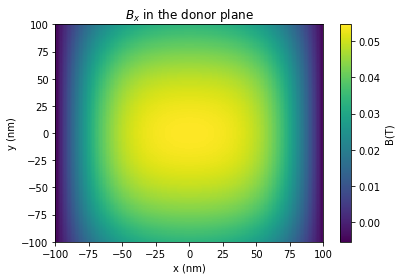

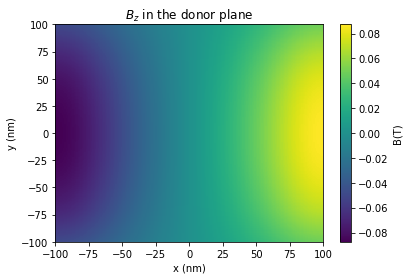

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = 'two.dat'
bxData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/Bx_"+dataset)
byData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/By_"+dataset)
bzData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/Bz_"+dataset)

print(bxData.shape)
x = np.linspace(-100,100,bxData.shape[1])
y = np.linspace(-100,100,bxData.shape[0])
XX,YY = np.meshgrid(x,y)

plt.figure(1)
plt.pcolor(XX,YY,bxData)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
cbar = plt.colorbar()
cbar.set_label("B(T)")
plt.title(r"$B_x$ in the donor plane")
plt.savefig("/Users/sandesh/Desktop/Bx.png",dpi=300)

plt.figure(2)
plt.pcolor(XX,YY,bzData)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
cbar = plt.colorbar()
cbar.set_label("B(T)")
plt.title(r"$B_z$ in the donor plane")
plt.savefig("/Users/sandesh/Desktop/Bz.png",dpi=300)

### Line cuts in the magnetic field 

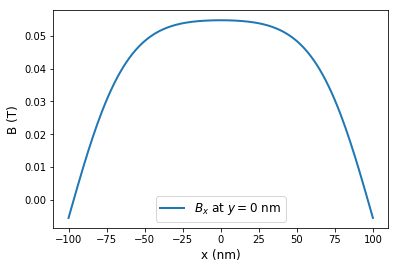

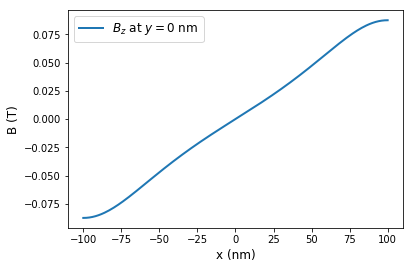

In [40]:
plt.figure(1)
plt.plot(x,bxData[100,:],linewidth=2.0,label=r"$B_x$ at $y = 0$ nm")
plt.xlabel(r"x (nm)",fontsize=12)
plt.ylabel(r"B (T)",fontsize=12)
plt.legend(fontsize=12)
plt.savefig("/Users/sandesh/Desktop/Bx_cut.png",dpi=300)

plt.figure(2)
plt.plot(x,bzData[100,:],linewidth=2.0,label=r"$B_z$ at $y = 0$ nm")
plt.xlabel(r"x (nm)",fontsize=12)
plt.ylabel(r"B (T)",fontsize=12)
plt.legend(fontsize=12)
plt.savefig("/Users/sandesh/Desktop/Bz_cut.png",dpi=300)

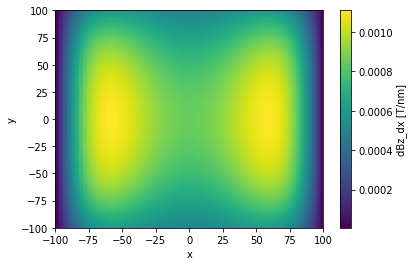

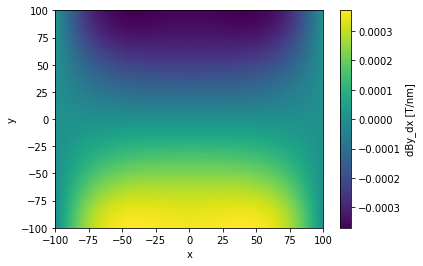

In [41]:
dx =200/bzData.shape[0] 
bz_gradient = np.gradient(bzData,dx)
plt.figure(1)
plt.pcolor(XX,YY,bz_gradient[1])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="dBz_dx [T/nm]")
plt.figure(2)
by_gradient = np.gradient(byData,dx)
plt.pcolor(XX,YY,by_gradient[1])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="dBy_dx [T/nm]")

conv_factor (nm) 0.6250000000000001


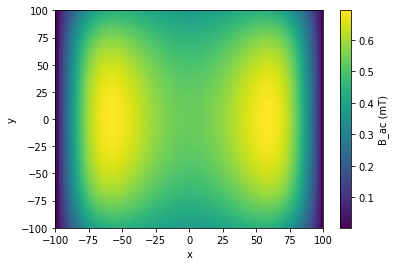

In [62]:
l_orb = 2.5e-9 # nm
Delta = 10e-3 #eV
E_ac = 1e6 #V/m

conv_factor = l_orb**2*E_ac/Delta 
print("conv_factor (nm)",conv_factor*1e9)
B_ac = 1e9 * conv_factor * np.sqrt(bz_gradient[1]**2 + by_gradient[1]**2)

plt.pcolor(XX,YY,B_ac*1e3)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="B_ac (mT)")



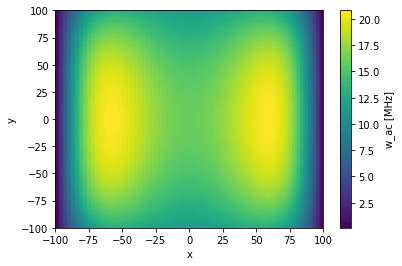

In [63]:
g_mu_b_h = 30e9
w_ac = g_mu_b_h * B_ac 

plt.pcolor(XX,YY,w_ac/1e6)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="w_ac [MHz]")

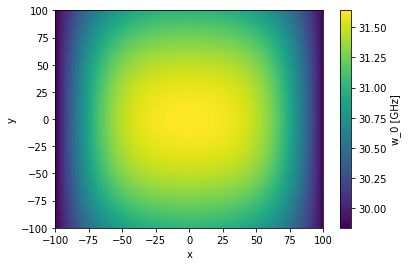

In [64]:
B_ext = 1
B_net = B_ext + bxData
w_0 = g_mu_b_h * B_net

plt.pcolor(XX,YY,w_0/1e9)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="w_0 [GHz]")

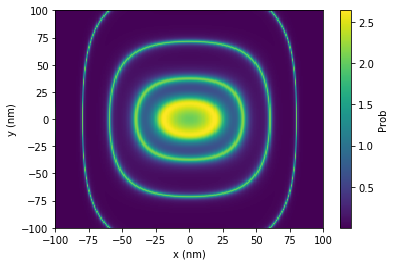

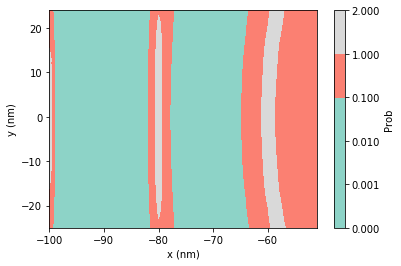

In [104]:
x_positions = np.arange(0,bxData.shape[0],20)
P = np.zeros(w_ac.shape)
for x_0 in x_positions:
    y_0 = 100
    P += w_ac*w_ac/(w_ac*w_ac + (w_0[y_0,x_0] - w_0)**2)

plt.figure(1)
plt.pcolor(XX,YY,P)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
plt.colorbar(label="Prob")

plt.figure(2)
x0 = 75
y0 = 0
size = 50
levels = [1e-4,1e-3,1e-2,1e-1,1,2]
plt.contourf(XX[x0:x0+size,y0:y0+size],YY[x0:x0+size,y0:y0+size],
             P[x0:x0+size,y0:y0+size],levels,cmap=plt.cm.Set3)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
plt.colorbar(label="Prob")

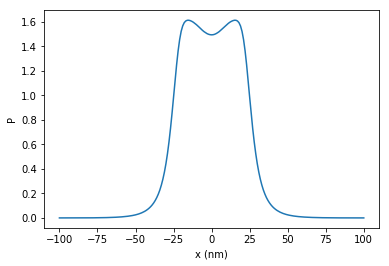

In [102]:
plt.plot(x,P[100,:])
plt.xlabel("x (nm)")
plt.ylabel("P")

In [80]:
np.min(P[100,:])

0.00054321816672284998

In [97]:
x_positions

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200])